In [2]:
import pandas as pd
import numpy as np
import itertools
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
anime_df = pd.read_csv("/Users/abhishekkumar/Documents/blah/kaggle/anime/anime.csv",header = 0)

In [18]:
anime_df.shape

(12294, 7)

In [19]:
rating_df = pd.read_csv("/Users/abhishekkumar/Documents/blah/kaggle/anime/rating.csv",header = 0)

In [20]:
rating_df.shape

(7813737, 3)

In [21]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [22]:
anime_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [23]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [24]:
#drop rows with null data
anime_df = anime_df.replace('Unknown',np.nan)
anime_df_nnull = anime_df.dropna()
anime_df_nnull.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [25]:
#Get unique type 
anime_df_nnull.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

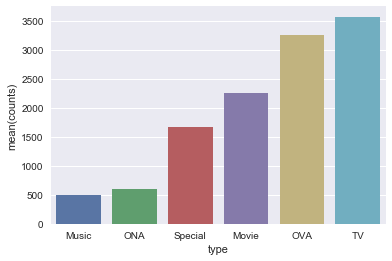

In [26]:
#Barplot to categorize  anime by type
type_data = itertools.chain(anime_df_nnull['type'].values.tolist())
type_counts = collections.Counter(type_data)
#convert counter to dataframe
type_df = pd.DataFrame.from_dict(type_counts,orient='index').reset_index().rename(columns={'index':'type',0:'counts'})
type_df = type_df.sort_values("counts")
sns.barplot(y=type_df['counts'],x=type_df['type'])

In [65]:
# next two are trying my way for above 
# anime_df_nnull['type'] is a series.
type_count_series = anime_df_nnull['type'].value_counts()
type_df = type_count_series.to_frame()
type_df

,type
TV,3568
OVA,3246
Movie,2258
Special,1665
ONA,606
Music,487


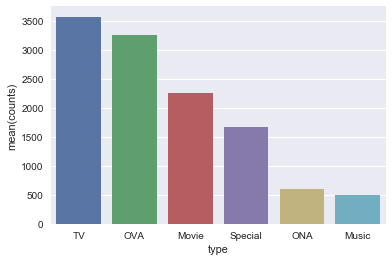

In [66]:
#need to reset index as to add as column
type_df = type_df.reset_index()
#rename columns from (index, type) to (type , count)
type_df.columns = ["type", "counts"]
type_df
sns.barplot(y=type_df['counts'],x=type_df['type'])

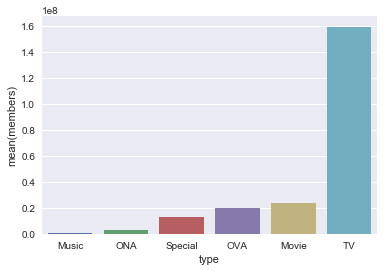

In [27]:
#categorize to see if members depend on type 
type_members_series = anime_df_nnull.groupby("type")['members'].agg('sum').reset_index()
type_members_df = pd.DataFrame(data = type_members_series)
type_members_df = type_members_df.sort_values("members")
sns.barplot(y=type_members_df['members'],x=type_members_df['type'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


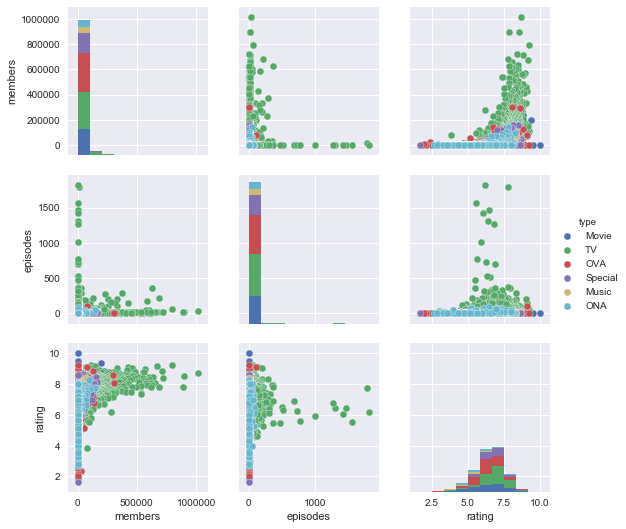

In [29]:
#episode is of type object.So convert it to numeric 
anime_df_nnull['episodes'] = anime_df_nnull['episodes'].astype(int)
sns.pairplot(anime_df_nnull[['type','members','episodes','rating']], hue='type')

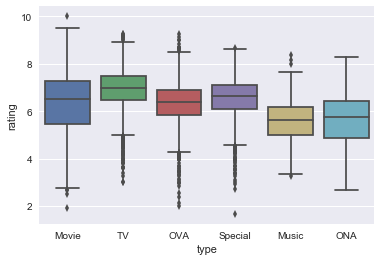

In [70]:
#type rating boxplot
sns.boxplot(data=anime_df_nnull,x='type',y='rating')

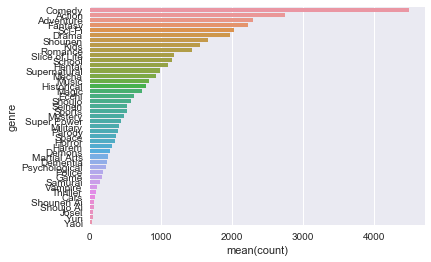

In [110]:
genre_values_list = anime_df_nnull["genre"].apply(lambda x : x.split(', ')).values.tolist()
genre_value_chain = itertools.chain(*genre_values_list)
#count
genre_counter = collections.Counter(genre_value_chain)
genre_df = pd.DataFrame.from_dict(genre_counter,orient='index').reset_index()
genre_df.columns = ["genre", "count"];
genre_df = genre_df.sort_values('count',ascending=False)
sns.barplot(x=genre_df['count'],y=genre_df['genre'])

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
5                 [Comedy, Drama, School, Shounen, Sports]
6                [Action, Adventure, Shounen, Super Power]
7                         [Drama, Military, Sci-Fi, Space]
8        [Action, Comedy, Historical, Parody, Samurai, ...
9        [Action, Comedy, Historical, Parody, Samurai, ...
10       [Drama, Fantasy, Romance, Slice of Life, Super...
11                                [Drama, School, Shounen]
12       [Action, Comedy, Historical, Parody, Samurai, ...
13       [Action, Drama, Mecha, Military, Sci-Fi, Super...
14                [Comedy, Drama, School, Shounen, Sports]
15                        [Adventure, Drama, Supernatural]
16                [Drama, Music, Romance, School, Shoune